In [96]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import logging
import copy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import lab_tools
import pickle
logging.basicConfig(level=logging.INFO)
import math
from scipy.constants import mu_0 as mu_0
from uncertainties import ufloat
import uncertainties
from uncertainties import unumpy
from matplotlib import pyplot
import os

def uplot(x_ufloats, y_ufloats, ax=plt, **kwargs):
    callable_ = getattr(ax, 'errorbar')
    return plt.errorbar( unumpy.nominal_values(x_ufloats), unumpy.nominal_values(y_ufloats),
      xerr=unumpy.std_devs(x_ufloats), yerr= unumpy.std_devs(y_ufloats),ecolor='green',barsabove=True, **kwargs )


def load_pickle(name):
    with open(os.path.join('pickles',f'{name}.pickle'), 'rb') as handle:
        return pickle.load(handle)

def save_pickle(name, pick):
    with open(os.path.join('pickles',f'{name}.pickle'), 'wb') as handle:
        return pickle.dump(pick,handle)
    


globals().update(load_pickle('freq_measurements'))
df = freq_data_frame_with_errors[10:40]

In [67]:
X = np.arange(-1e4, 1e5, 1e3)

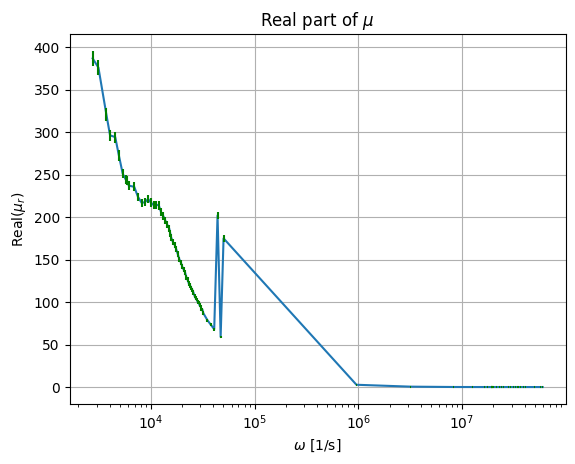

In [68]:
fig1 = plt.figure()
uplot(freq_data_frame_with_errors['frequencies'], freq_data_frame_with_errors['Real_mu'])
pyplot.xlabel('$\omega$'+' [1/s]')
pyplot.ylabel('Real($\mu_r$)')
pyplot.title('Real part of $\mu$')
pyplot.xscale('log')
plt.grid()
plt.savefig('images/real.svg', format='svg')

In [4]:
# fit_params image
ci = -2.9e5
ti = 4.1e-5
ui = 5.8e5

# fit_params real
cr = 5.547
tr = 5.158e-05
ur = 285.1

X = np.arange(-1e4, 1e5, 1e3)

def theory_image(x,u,t,c):
    return u * t* x / (1+t**2*x**2) + c 

def theory_real(x,u,t,c):
    return u * x / (1+t**2*x**2) + c 


fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces
# fig.add_trace(
#     go.Scatter(x=df['frequencies'], y=df['Real_mu'], name="real part"),
#     secondary_y=False,
# )

fig.add_trace(
    go.Scatter(x=df['frequencies'], y=f(df['frequencies'], u, t, c), name="fitting"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['frequencies'], y=f(df['frequencies'], u, t, c), name="fitting"),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=df['frequencies'], y=df['Im_mu'], name="imaginary part", ),
    secondary_y=True,
)

fig.show()
px.line(x=X, y=f(X, u, t, c))


NameError: name 'df' is not defined

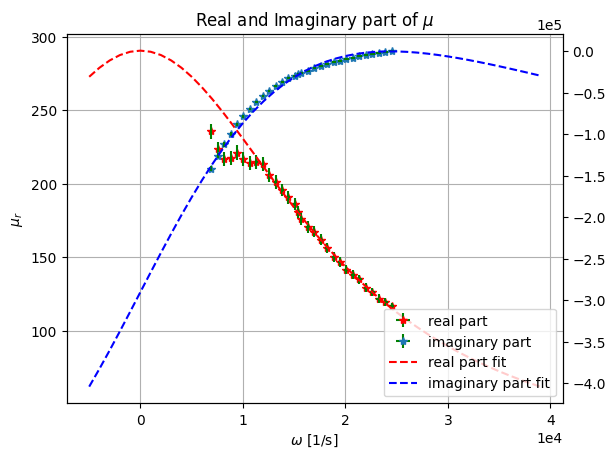

In [64]:
# fit_params image
ci = -2.9e5
ti = 4.1e-5
ui = 5.8e5

# fit_params real
cr = 5.547
tr = 5.158e-05
ur = 285.1
X = np.arange(-5e3, 4e4, 1e3)

def theory_image(x,u,t,c):
    return u * t* x / (1+t**2*x**2) + c 

def theory_real(x,u,t,c):
    return u / (1+t**2*x**2) + c 


real_fig, real_ax = plt.subplots()
plot_real = uplot(df['frequencies'], df['Real_mu'], ax=real_ax, color='r', fmt='*')
pyplot.xlabel('$\omega$'+' [1/s]')

real_ax.set_ylabel('Real($\mu_r$)')
pyplot.ylabel('$\mu_r$')
pyplot.title('Real and Imaginary part of $\mu$')
# pyplot.xscale('log')
plt.grid()
plot_real_fit, = real_ax.plot(X, theory_real(X, ur, tr, cr), 'r--')

im_ax = real_ax.twinx()
im_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
im_ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plot_im = uplot(df['frequencies'], df['Im_mu'], ax=im_ax, fmt='*')
plot_im_fit, = im_ax.plot(X, theory_image(X, ui, ti, ci),'b--')

plt.legend([plot_real, plot_im, plot_real_fit, plot_im_fit], ['real part', 'imaginary part', 'real part fit', 'imaginary part fit'])

plt.savefig('images/real.svg', format='svg')


In [80]:
df['mu_abs'] = (df['Real_mu'].to_numpy()**2+df['Im_mu'].to_numpy()**2)**0.5

/var/folders/wt/yw5gmc4d5_d4n1gg0kg1s9tr0000gn/T/ipykernel_96730/3230609342.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
fdf = freq_data_frame[10:40]

In [91]:
fdf.hvplot.scatter(x='frequencies', y=['Real_mu', 'Im_mu'])

:NdOverlay   [Variable]
   :Scatter   [frequencies]   (value)

In [120]:
tau = 1 / df.iloc[-1]['frequencies'] 
tau

1.6723886008258963e-08+/-1.6723886008258966e-10

4.080845470302613e-05+/-4.080845470302613e-07

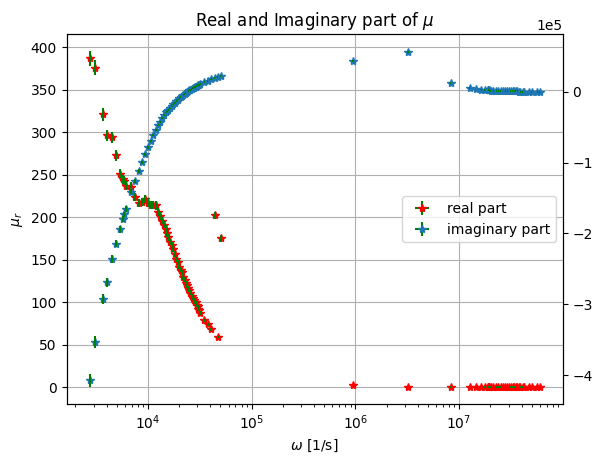

In [119]:
real_fig, real_ax = plt.subplots()
df = freq_data_frame_with_errors
plot_real = uplot(df['frequencies'], df['Real_mu'], ax=real_ax, color='r', fmt='*')
pyplot.xlabel('$\omega$'+' [1/s]')

real_ax.set_ylabel('Real($\mu_r$)')
pyplot.ylabel('$\mu_r$')
pyplot.title('Real and Imaginary part of $\mu$')
pyplot.xscale('log')
plt.grid()

im_ax = real_ax.twinx()
im_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plot_im = uplot(df['frequencies'], df['Im_mu'], ax=im_ax, fmt='*')

plt.legend([plot_real, plot_im], ['real part', 'imaginary part', 'real part fit', 'imaginary part fit'], loc='center right')

plt.savefig('images/full.svg', format='svg')


In [130]:
from uncertainties.umath import *

In [131]:
tb = ufloat(4.1e-5, 3e-6)
ti = ufloat(4.08e-5, 4.08e-7)
tr = ufloat(4.51e-05, 2e-6)

db = abs(tb - ti) / tb
dr = abs(tr - ti) / tr

print (db, dr)


0.00+/-0.07 0.10+/-0.04


In [133]:
(4.1e-5 - 4.08e-5) / 4.1e-5 * 100

0.4878048780487758